# Bonus assignement

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstNameLastName.ipynb`. It should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it. 
- Read each instruction carefully and provide complete answers to each question/task
- You are allowed to use Keras or Pytorch 

> **_NOTE:_**  Write your email address in the cell below

j.totanji@innopolis.university

### I- Open questions (3 points)

Read [this article](https://link.springer.com/referenceworkentry/10.1007/978-0-387-73003-5_304) and answer the following questions:

1. What is incremental learning?

    - It is a Machine Learning paradigm that -opposite to traditional machine learning- does not assume the availabtility of a sufficient training set before the learning process, rather, the training examples appear over time. Per this paradigm, the learning process takes place whenever new examples emerge and adjusts what ahs been learned according to these new examples.

2. Why is it important for us to create neural networks that would someday be able to learn incrementally?

    - Since the original goal of the neural network approach is to create a computational system that could solve problems like a human brain, then we should try to simulate the way humans acquire knowledge, that is, incrementally over a period of time.
    
    - Additionally, if we want neural networks to solve real-world problems, then they have to be able to learn incrementally, because many real-world applications cannot match the ideal case of having a sufficient training set. Some examples of these problems are:

        - Applications where the target concepts change over time (Robotics, Intelligent Agent).
        - Applications where the “sufficient training sets” are too big (Content based image retrieval, Face recognition).
        - Applications where the training examples are obtained over time (Visual object tracking, Software project estimation).

3. What is catastrophic forgetting?

     - Catastrophic Forgetting is the tendency of an artificial neural network to abruptly and drastically forget previously learned information upon learning new information. Specifically, catastrophic forgetting occurs when a network is trained sequentially on multiple tasks because the weights in the network that are important for task A are changed to meet the objectives of task B. And is the main limitation of neural networks being unable to build knowledge incrementally over large periods of time.

### II- Train simple CNN model for digit classification (5 points)

Instructions:
- Load MNIST dataset and split it in **Tr**ainning (`Tr`) and **Te**ting set (`Te`), 80% and 20% respectively.
- Train a simple CNN for digit classification on the training set. 
- After fine tuning your CNN, evaluate the `overall` and the `class-wise` performances on `Te`. 
>**NOTE:** For the class-wise performance, you should plot (e.g., bar plots) the performance of your model on each class.

In [1]:
# Imports
import torch
import numpy as np
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch import optim
from torch.utils.data import ConcatDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [24]:
# Loading the MNIST dataset and splitting into training and testing sets

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Grayscale(),
                                transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='data', train=False, transform=transform, download=True)

# Added together both datasets instead of splitting only one
data = ConcatDataset([train_data, test_data])

# 80 20 split
train_set, test_set = torch.utils.data.random_split(data, [56000, 14000])

loaders = {
    'train' : DataLoader(train_set, batch_size=100, shuffle=True, num_workers=1),
    
    'test'  : DataLoader(test_set, batch_size=100, shuffle=True, num_workers=1),
}

loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f546e38f130>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f546ef9f910>}

In [116]:
# The CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [117]:
# Training the model

cnn = CNN()

num_epochs = 10
loss_func = nn.CrossEntropyLoss() 
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)  

def train(num_epochs, cnn, loaders):

    cnn.train()

    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            output = cnn(images)[0]
            loss = loss_func(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/560], Loss: 0.0714
Epoch [1/10], Step [200/560], Loss: 0.1775
Epoch [1/10], Step [300/560], Loss: 0.0708
Epoch [1/10], Step [400/560], Loss: 0.1117
Epoch [1/10], Step [500/560], Loss: 0.0413
Epoch [2/10], Step [100/560], Loss: 0.0249
Epoch [2/10], Step [200/560], Loss: 0.1250
Epoch [2/10], Step [300/560], Loss: 0.0282
Epoch [2/10], Step [400/560], Loss: 0.0546
Epoch [2/10], Step [500/560], Loss: 0.0290
Epoch [3/10], Step [100/560], Loss: 0.0212
Epoch [3/10], Step [200/560], Loss: 0.0705
Epoch [3/10], Step [300/560], Loss: 0.0127
Epoch [3/10], Step [400/560], Loss: 0.0122
Epoch [3/10], Step [500/560], Loss: 0.0091
Epoch [4/10], Step [100/560], Loss: 0.0826
Epoch [4/10], Step [200/560], Loss: 0.0442
Epoch [4/10], Step [300/560], Loss: 0.0363
Epoch [4/10], Step [400/560], Loss: 0.0887
Epoch [4/10], Step [500/560], Loss: 0.1079
Epoch [5/10], Step [100/560], Loss: 0.0091
Epoch [5/10], Step [200/560], Loss: 0.0155
Epoch [5/10], Step [300/560], Loss: 0.0277
Epoch [5/10

In [124]:
# Testing the model and measuring preformance

classes = [i for i in range(10)]

def test():
    cnn.eval()
    with torch.no_grad():

        class_wise_acc = [(0, 0) for c in classes]

        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            overall_acc = (pred_y == labels).sum().item() / float(labels.size(0))

            for c in classes:
                class_wise_acc[c] = (class_wise_acc[c][0] + ((pred_y == labels) * (labels == c)).sum().item(),
                                     class_wise_acc[c][1] + float((labels == c).sum().item()))

            pass
    
    class_wise_acc = [num/denom for (num, denom) in class_wise_acc]

    return overall_acc, class_wise_acc

overall_accuracy, class_wise_accuracy = test()

In [127]:
# Performance on Test Set
print('The overall test Accuracy of the model on the test set: %.2f' % overall_accuracy)
print('The class-wise accuracy of the model on the test set:')

for i, acc in enumerate(class_wise_accuracy):
    print(f'Class: {i} | Accuracy: {acc}')

The overall test Accuracy of the model on the test set: 0.97
The class-wise accuracy of the model on the test set:
Class: 0 | Accuracy: 0.9687045123726347
Class: 1 | Accuracy: 0.9936427209154481
Class: 2 | Accuracy: 0.9733333333333334
Class: 3 | Accuracy: 0.9781690140845071
Class: 4 | Accuracy: 0.9875640087783467
Class: 5 | Accuracy: 0.9736842105263158
Class: 6 | Accuracy: 0.9949238578680203
Class: 7 | Accuracy: 0.9872225958305313
Class: 8 | Accuracy: 0.966467958271237
Class: 9 | Accuracy: 0.9608411892675852


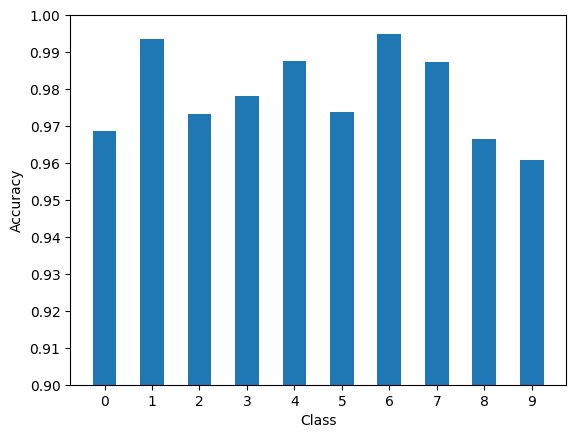

In [141]:
# Plotting class-wise accuracy

y_ticks = [i for i in np.arange(0.90, 1.01, 0.01)]

fig = plt.figure()
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.xticks(classes)
plt.yticks(y_ticks)
plt.ylim(0.90,1.00)
plt.bar(classes, class_wise_accuracy, 0.5)
plt.show()

### III- Create different tasks from the MNIST dataset (2 points)

Split `Tr` into 3 datasets (tasks) according to the following distribution.

- Task 1 contains digits of classes 0, 1, and 2. 
- Task 2 contains classes 3, 4, and 5. 
- Task 3 contains classes 6, 7, 8, and 9.
 
*The following picture showcases the general scheme*
<center>
<img src='https://drive.google.com/uc?id=1vdDgdN9BGQ2Jl3Yg4YiPvfb5fcAeJZJ-' style="width:500px;"> 
</center>


In [9]:
# Storing the data according to labels

labelled_data = {}

for i in range(0, len(train_set)):
    target = train_set[i][1]

    if not target in labelled_data:
        labelled_data[target] = []
        labelled_data[target].append(train_set[i])
    
    else:
        labelled_data[target].append(train_set[i])

In [23]:
# Splitting the data into 3 subsets

train_set_1 = []
for i in range(0, 3):
    train_set_1 += labelled_data[i]

train_set_2 = []
for i in range(3, 6):
    train_set_2 += labelled_data[i]

train_set_3 = []
for i in range(6, 10):
    train_set_3 += labelled_data[i]

print("Corresponding lengths of the 3 partial datasets:")

print(f"Set 1: {len(train_set_1)} Items\nSet 2: {len(train_set_2)} Items\nSet 3: {len(train_set_3)} Items")

Corresponding lengths of the 3 partial datasets:
Set 1: 17385 Items
Set 2: 16179 Items
Set 3: 22436 Items


In [25]:
# Feeding the data into DataLoaders

loaders = {
    'train_1' : DataLoader(train_set_1, batch_size=100, shuffle=True, num_workers=1),
    'train_2' : DataLoader(train_set_2, batch_size=100, shuffle=True, num_workers=1),
    'train_3' : DataLoader(train_set_3, batch_size=100, shuffle=True, num_workers=1),
    'test' : DataLoader(test_set, batch_size=100, shuffle=True, num_workers=1)
}

loaders

{'train_1': <torch.utils.data.dataloader.DataLoader at 0x7f546e405160>,
 'train_2': <torch.utils.data.dataloader.DataLoader at 0x7f546e395a00>,
 'train_3': <torch.utils.data.dataloader.DataLoader at 0x7f5534064520>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f5534064760>}

### IV- Class-incremental learning implementation (8 points)

Using the different tasks (datasets) you created previously, implement a CNN for class incremental learning according to the following instructions. 
- The neural network architecture is not given, choose and tune your architecture following DNNs best practices. Similarly for the training no hyperparameters are given to you, you should choose them and justify your choice. Hyperparameter tuning is not mandatory but doing it would be a plus.
- Your network should have shared feature extractor (shared layers) part and separate classifier head (e.g., fully connected layers) for each task (see the figure below).
- When training on a new task, the shared layers part will get updated along with the head of the current task. 
- After training each task (Task 1 & 2), evaluate (and plot) the performances of the current and the previous tasks on `Te`.
    - Once the training on the last task is complete, test the model on `Te` and compare the performance of the network with the CNN trained in II, i.e., plot the `overall` and the `class-wise` performances for classical learning and incremental learning.

<center>
<img src='https://drive.google.com/uc?id=1HfwcMP7jGoJnYEMu7jDqloQNogEZsjrJ'  style="width:250px;"> 
</center>


### V- Report (2 points)
Write a short report on the results you got and what you learned from this activity

I. The open questions:
    - The article was an interesting read about a problem that we -as humans- are trying to tackle at the moment. I knew almost nothing about incremental learning but after reading the article I was a little scared of what we might be able to create (emphasis on "create") with such technologies :)

II. Train simple CNN model for image calssification:
- Data Preprocessing and Augmentation:
    - I first loaded the MNIST Dataset from Pytorch. The default Train and Test splits were not the required 80/20 ratio. I decided to merge both the datasets into one larger set, and then randomly split that into 80/20 training and testing sets.

    - Not a whole lot went into Agumentation since the MNIST set is quite "clean", so to speak. And also because the testing was going to happen on data from the same domain which doesnt require the model to handle any complex cases (e.g. real-life numbers, etc.). All I did was Grayscale the images to get rid of any color noise, and then transform them into a Tensor and Normalize them for faster processing.

- The CNN Model:
    - The model I used here was introduced in Lab 9 of our course to solve the same problem and achieved high accuracy.

    - The model itself is quite simple, consisting of one Convolutional layer which uses a ReLu activation function, followed by a fully-connected layer with 10 outputs, each output corresponding to one of our target classes.

- Training and Testing:
    - Trained the model for 10 epochs and used CrossEntropyLoss to calculate the loss.

    - For testing, I used the final model to make predictions on my test dataset from earlier.

    - Calculating the accuracy was pretty straightforward, I simply divided the number of correct prediction over the total number of datapoints. For class-wise accuracy, the same technique was used, but using a list to keep track of the number of correct predicitons, and total number of datapoints for each class individually.

- Even though this part of the task did not include a lot of new things. It was actually very beneficial for me to implement as I employed all the knowledge and experience from the mistakes that I made in the previous assignment to go through it pretty smoothly :)

III. Create different tasks from the MNIST Dataset:

- I first used dictionary to group datapoints which have the same target into separate lists.

- Then, I concatenated the lists of the corresponding groups ([0, 2], [3, 5], [6, 9]) to create new datasets.

- Finally, I fed the 3 datasets along with the test set from the previous task into a DataLoader to prepare them for Incremental Learning.

### Resources:
- Incremental Learning: 
    - https://link.springer.com/referenceworkentry/10.1007/978-0-387-73003-5_304
<br></br>

- Catastrophic Forgetting:
    - https://medium.com/dataseries/some-ideas-about-catastrophic-forgetting-in-neural-networks-34b2c95c9d13
    - https://en.wikipedia.org/wiki/Catastrophic_interference
<br></br>

- Concatenating Datasets:

    - https://discuss.pytorch.org/t/combine-train-and-test-data/24004
<br></br>

- Measuring class-wise accuracy:

    - https://stackoverflow.com/questions/62958248/calculate-accuracy-for-each-class-using-cnn-and-pytorch
<br></br>

- The CNN model, training, and testing:

    - Intro to ML Course, Lab 9